# Network Analysis for Codegov

## Contributor Network

In [ ]:
from sqlalchemy import create_engine

# Credentials to database connection
hostname="oss-1.cij9gk1eehyr.us-east-1.rds.amazonaws.com"
dbname="codegov"
uname=
pwd=

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [17]:
 # Query to fetch all records

import pandas as pd
from sqlalchemy.sql import text
sql = '''
    SELECT * FROM codegov_edgelist_users;
'''
with engine.connect().execution_options(autocommit=True) as conn:
    query = conn.execute(text(sql))         
df_combos = pd.DataFrame(query.fetchall())

KeyboardInterrupt: 

In [24]:
df_combos

,index,source,target,weight
0,0,,,1
1,1,,0111sandesh,1
2,2,,0mp,3
3,3,,0x0L,1
4,4,,0x3430D,1
...,...,...,...,...
2592412,2592412,zouihao,zxdawn,1
2592413,2592413,zpatrick,zsalzbank,1
2592414,2592414,zploskey,zywina,1
2592415,2592415,zssherman,zxdawn,1


#### Creating Network

This is the Codegov Contributor Network comrpising of GitHub users contributing to a Codegov Project repository on Github as the nodes in the network. Everytime a contributor collaborates with another contributor an edge is formed - the weight of the edge is the number of projects (repositories) collaborated on. 

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df_combos.replace('',np.nan,regex = True, inplace=True)

df_combos.dropna(subset=['source'], inplace=True)

In [27]:
df_combos

,index,source,target,weight
16558,16558,0111sandesh,SaikrishnaBairamoni,1
16559,16559,0111sandesh,Schwartz-Matthew-bah,1
16560,16560,0111sandesh,TonyEnglish,1
16561,16561,0111sandesh,ToryB1,1
16562,16562,0111sandesh,abey-yoseph,1
...,...,...,...,...
2592412,2592412,zouihao,zxdawn,1
2592413,2592413,zpatrick,zsalzbank,1
2592414,2592414,zploskey,zywina,1
2592415,2592415,zssherman,zxdawn,1


In [28]:
G = networkx.from_pandas_edgelist(df_combos, edge_attr=True)

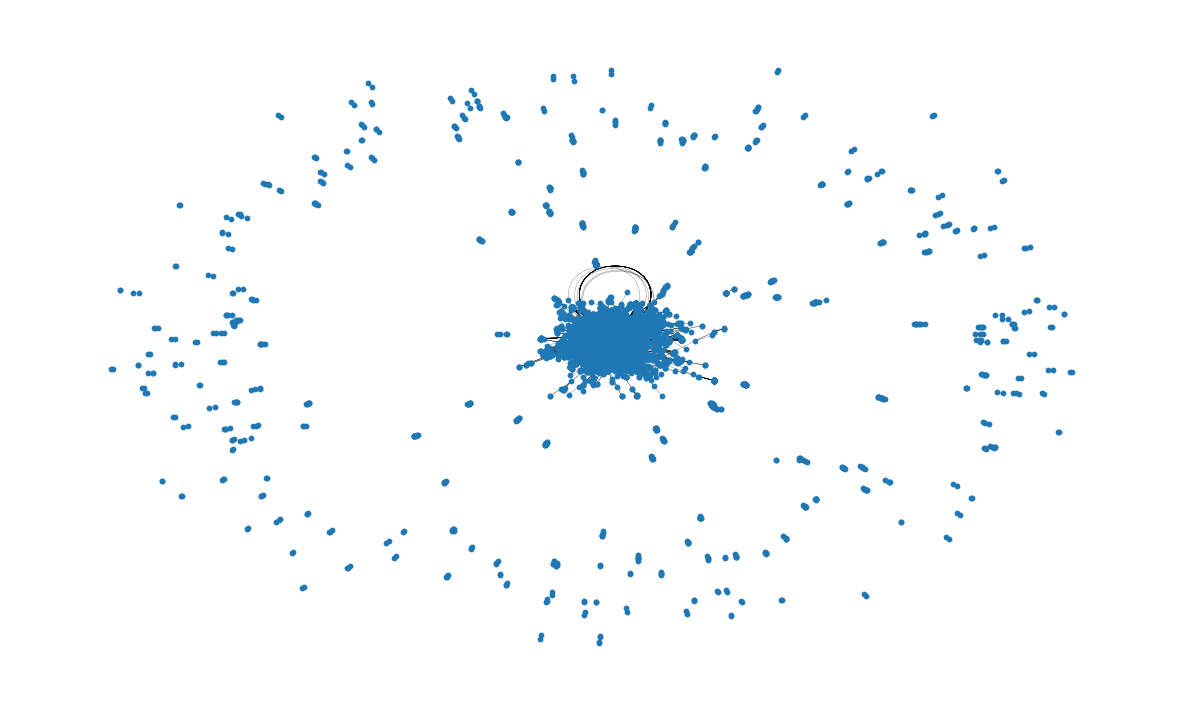

In [20]:
pos = nx.spring_layout(G)
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

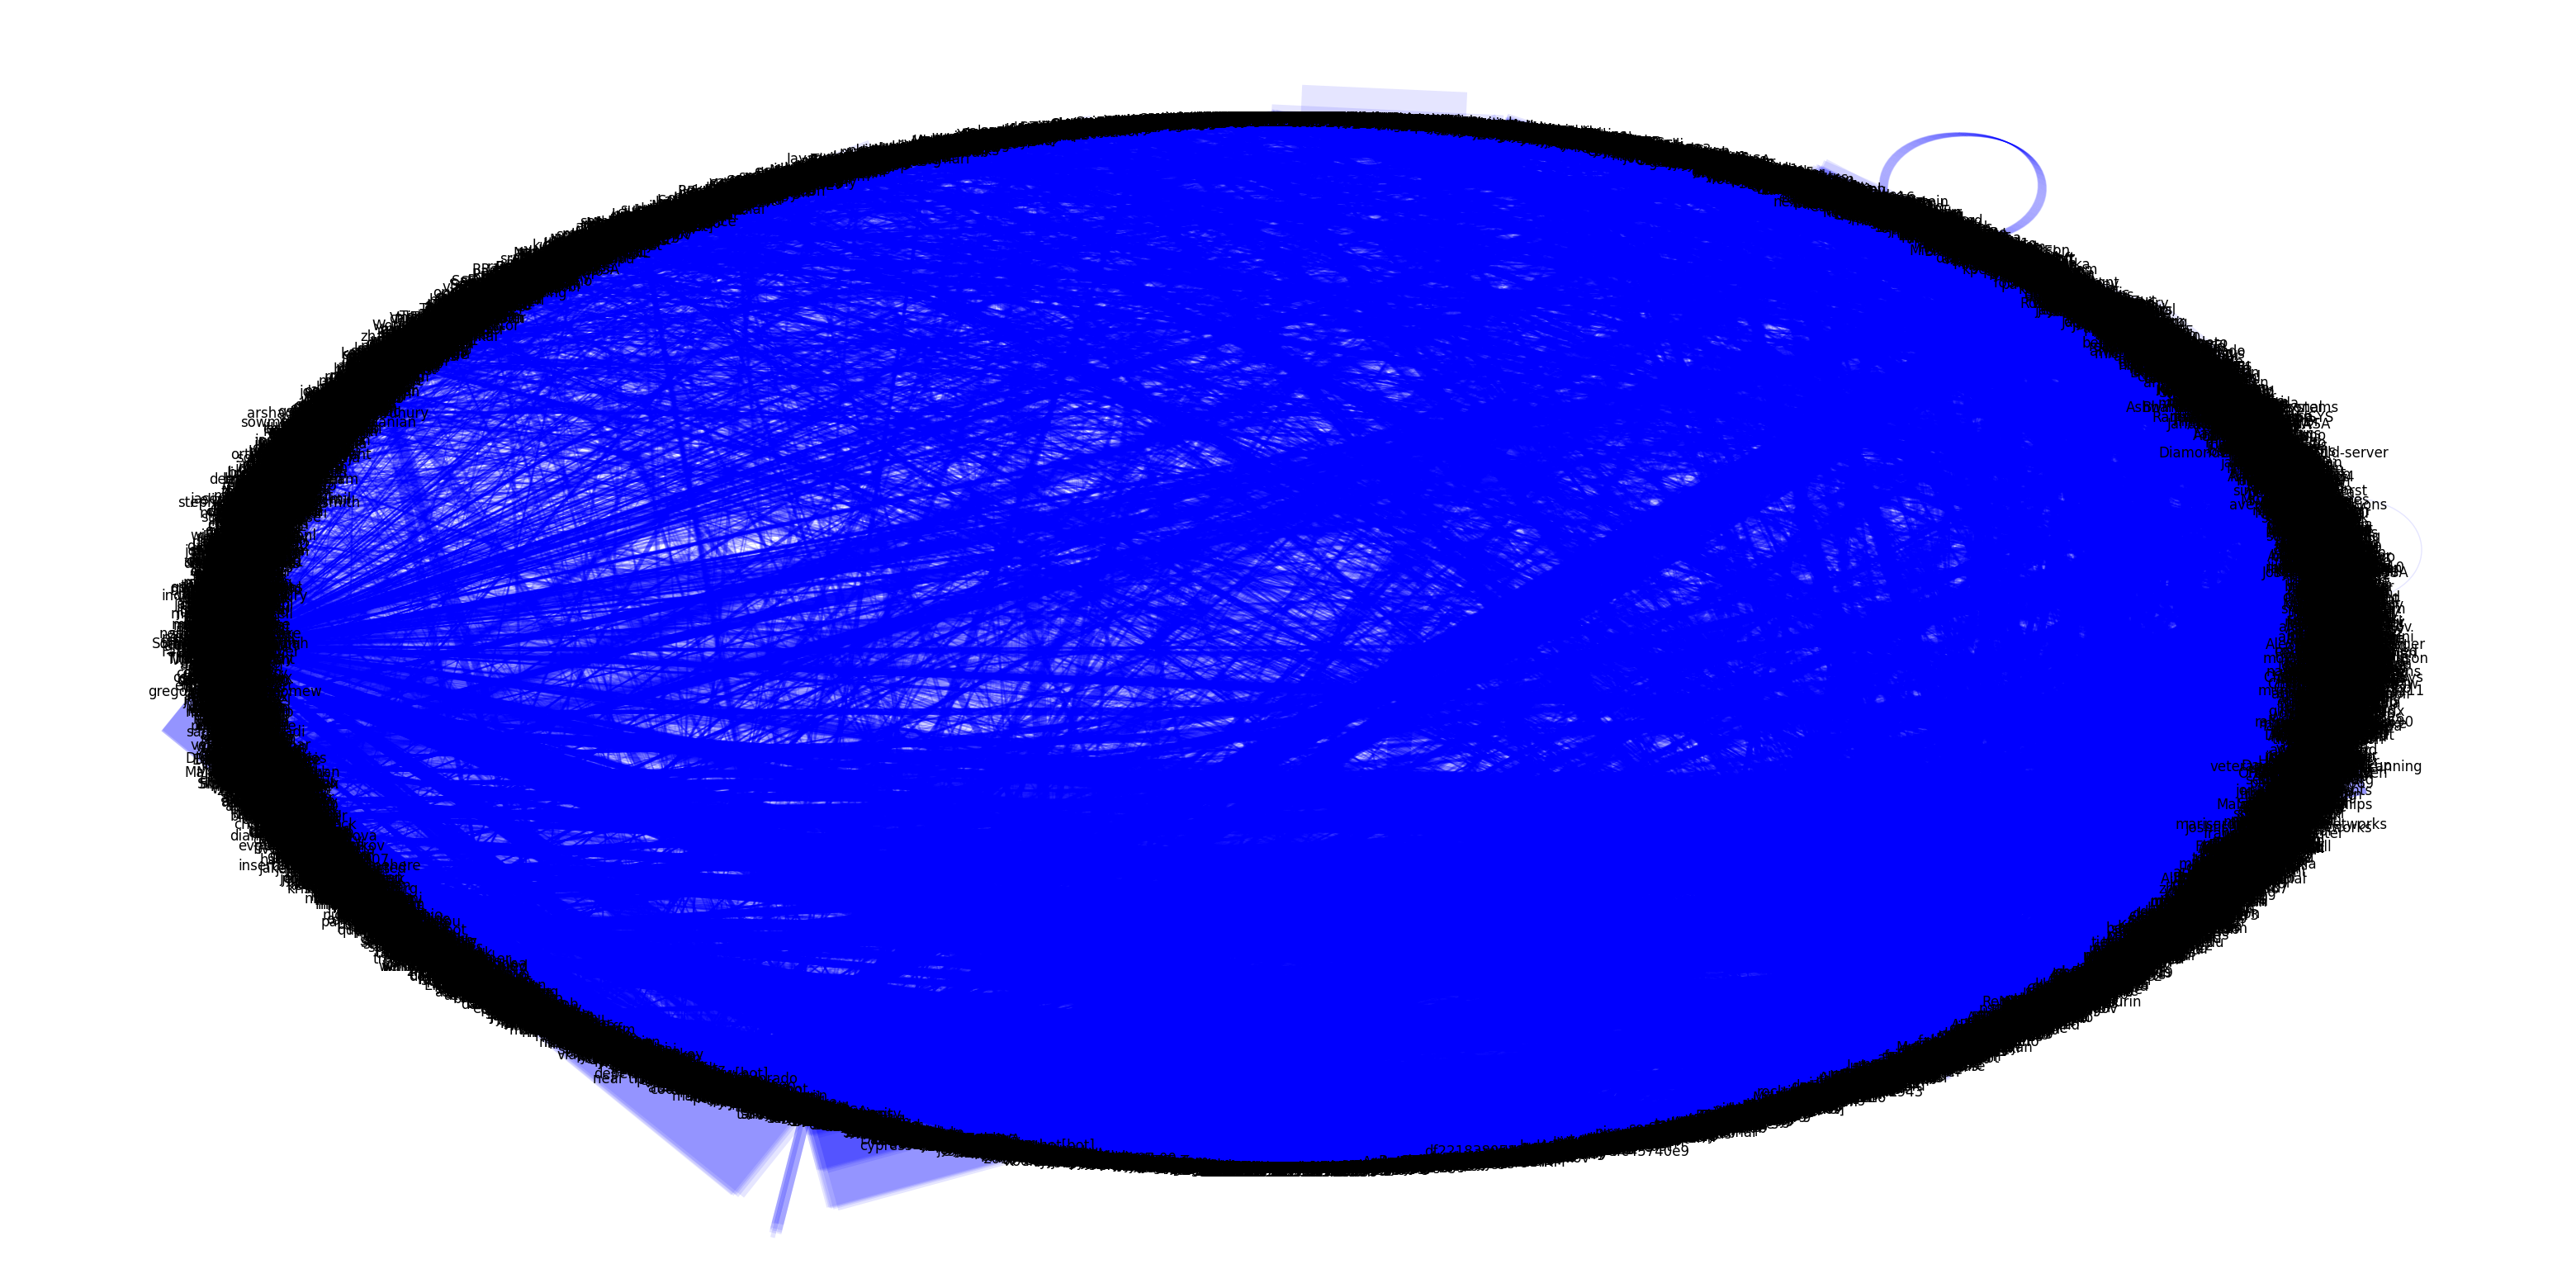

In [9]:
# Reference link: https://stackoverflow.com/questions/62935983/vary-thickness-of-edges-based-on-weight-in-networkx

widths = networkx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()

plt.figure(figsize=(40,20))

pos = networkx.shell_layout(G)
networkx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1,
                       node_color='lightblue')
networkx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='blue',
                       alpha=0.1)
networkx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.savefig('Network.png', bbox_inches='tight')
plt.show(block=False)

What are the overall structural features of the OSS networks (in Table 1)? How do they differ across fields, sectors, institutions, and countries? Units of analysis (OSS actors): projects, categories, developers, institutions, sectors, countries?

### Computing Network Metrics

Global and local measures, e.g., density, diameter, clustering; and statistical properties.

#### Network Density

In [29]:
networkx.density(G)

0.017445293549385073

Add more details on interpretation of the density

The network density for the Codegov Contributor Network is 0.017. This network metric will be compared against other knowledge networks to evaluate similarities/divergence.

#### Network Diameter

In [9]:
networkx.is_connected(G)

False

In [10]:
largest_cc = max(networkx.connected_components(G), key=len)

In [11]:
len(largest_cc)

16116

Sub graph of largest component is x of y total conn

In [12]:
Gcc = sorted(networkx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

In [16]:
# Takes hours to run
networkx.diameter(G0)

KeyboardInterrupt: 

In [13]:
networkx.approximation.diameter(G0)

10

We calculate the diameter of the largest connected component of the graph because the graph is not completely connected. The diameter of the largest component is 10. We can compare this with other knowledge networks.

#### Centrality Measures

##### Degree Centrality

In [18]:
centr_dict = networkx.degree_centrality(G)

In [2]:
degree_centrality = networkx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

NameError: name 'networkx' is not defined

The degree_centrality function returns a dictionary of nodes and their degrees. We sort this for the n highest degrees and present the data below.

In [19]:
centr_dict

{'0111sandesh': 0.0013384543761638733,
 'SaikrishnaBairamoni': 0.0014548417132216015,
 'Schwartz-Matthew-bah': 0.0013384543761638733,
 'TonyEnglish': 0.0013384543761638733,
 'ToryB1': 0.0013384543761638733,
 'abey-yoseph': 0.0013384543761638733,
 'alexsobledotgov': 0.004422718808193668,
 'bbrotsos': 0.0031424581005586594,
 'dan-du-car': 0.0014548417132216015,
 'danrasband': 0.0013384543761638733,
 'dependabot[bot]': 0.18168063314711358,
 'dmccoystephenson': 0.0014548417132216015,
 'drewjj': 0.0014548417132216015,
 'hmusavi': 0.0014548417132216015,
 'iyourshaw': 0.0013384543761638733,
 'jtbaird': 0.0013384543761638733,
 'lauraGgit': 0.014373836126629423,
 'mgarramo': 0.0013384543761638733,
 'mvs5465': 0.0013384543761638733,
 'payneBrandon': 0.0014548417132216015,
 'snallamothu': 0.0013384543761638733,
 'southernsun': 0.0013384543761638733,
 'tonychen091': 0.0014548417132216015,
 'trevor-trou': 0.0013384543761638733,
 '0mp': 0.03066806331471136,
 '12101111': 0.03066806331471136,
 'Attila

In [20]:
df_centr = pd.DataFrame.from_dict(centr_dict, orient= 'index')

In [21]:
df_centr

,0
0111sandesh,0.001338
SaikrishnaBairamoni,0.001455
Schwartz-Matthew-bah,0.001338
TonyEnglish,0.001338
ToryB1,0.001338
...,...
thompsonm-ANL,0.000058
trustdarkness,0.000058
wohler,0.000058
wrhumph,0.000058


In [22]:
df_centr.to_csv('codegov_degree_centrality.csv', header=False)

In [14]:
df_centr = pd.read_csv('codegov_degree_centrality.csv')

In [44]:
df_centr.to_sql('codegov_network_degree_centrality', engine, if_exists='replace')

17184

How is the function normalizing the centrality

In [15]:
df_centr

,0111sandesh,0.0013384543761638733
0,SaikrishnaBairamoni,0.001455
1,Schwartz-Matthew-bah,0.001338
2,TonyEnglish,0.001338
3,ToryB1,0.001338
4,abey-yoseph,0.001338
...,...,...
17179,thompsonm-ANL,0.000058
17180,trustdarkness,0.000058
17181,wohler,0.000058
17182,wrhumph,0.000058


In [16]:
df_centr.columns = ['node', 'degree']

In [17]:
df_centr

,node,degree
0,SaikrishnaBairamoni,0.001455
1,Schwartz-Matthew-bah,0.001338
2,TonyEnglish,0.001338
3,ToryB1,0.001338
4,abey-yoseph,0.001338
...,...,...
17179,thompsonm-ANL,0.000058
17180,trustdarkness,0.000058
17181,wohler,0.000058
17182,wrhumph,0.000058


In [18]:
df_centr.sort_values(by='degree', ascending=False, inplace=True)

In [19]:
# Took top 2nd to 22nd to remove `Dependabot` a bot that has the highest degree centrality
centr_chart = df_centr[1:22]

Our users data gathered from GitRipper has bots - we may need to consider cleaning the data to filter out bots.

In [20]:
centr_chart

,node,degree
1104,frewsxcv,0.137744
904,bmwiedemann,0.130412
1419,mgorny,0.124069
1452,msabramo,0.122905
1618,rupprecht,0.121858
217,eli-schwartz,0.116562
2132,hartzell,0.115922
1135,goxberry,0.114234
4114,evanphx,0.108357
1372,luzpaz,0.107891


<Axes: xlabel='degree', ylabel='node'>

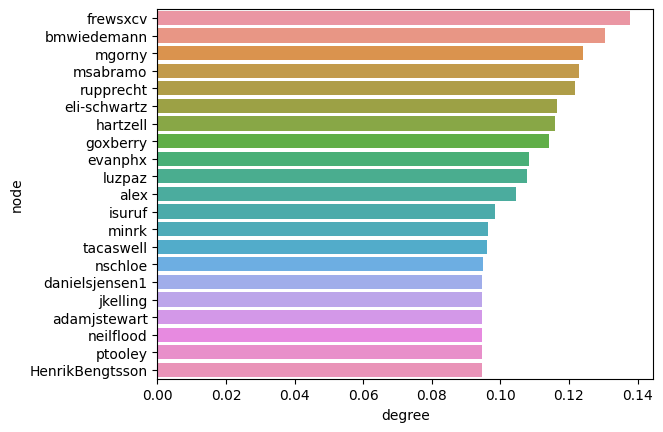

In [21]:
import seaborn as sns

sns.barplot(data=centr_chart, x="degree", y="node")

The viz above shows the top 20 contributors by degree centrality - we can merge this data with the users data to gather additional information on the users such as their locations/organizations etc.

In [22]:
from sqlalchemy import inspect
inspector = inspect(engine)

# Get table information
print(inspector.get_table_names())

['codegov_agency_counts', 'codegov_agency_hosting', 'codegov_edgelist_users', 'codegov_gh_agency_count', 'codegov_gh_data_commits', 'codegov_gh_data_repos', 'codegov_slugs', 'codegov_users', 'codegov_users_sectored', 'codegov_users_sectors']


In [23]:
 # Query to fetch all records

import pandas as pd
from sqlalchemy.sql import text
sql = '''
    SELECT * FROM codegov_users_sectors;
'''
with engine.connect().execution_options(autocommit=True) as conn:
    query = conn.execute(text(sql))         
df_users = pd.DataFrame(query.fetchall())

In [24]:
node_users = pd.merge(centr_chart, df_users, left_on='node', right_on='login', how='left')

Below we will add information about the agencies that the Contributors belong to / work with.

In [25]:
 # Query to fetch all records

import pandas as pd
from sqlalchemy.sql import text
sql = '''
    SELECT * FROM codegov_edge_combos;
'''
with engine.connect().execution_options(autocommit=True) as conn:
    query = conn.execute(text(sql))         
df_agency = pd.DataFrame(query.fetchall())

In [26]:
node_users_agency = pd.merge(node_users, df_agency, left_on='node', right_on='login', how='left')

In [27]:
node_users_agency.drop_duplicates('node').reset_index().drop(columns=['index', 'row_names', 'login_x', 'login_y'])[2:]

,node,degree,name,email,location,company,pronouns,bio,website,twitter,organization,sector,country,iso_2,slug,agency
2,mgorny,0.124069,Michal Gorny,mgorny@gentoo.org,"Greater Poland, PL",@projg2,None,@Gentoo developer since 2010. Maintaining Pyth...,https://mgorny.pl/,None,None,Unknown,Poland,PL,pmodels/bolt,Department of Energy
3,msabramo,0.122905,Marc Abramowitz,marc@marc-abramowitz.com,"San Jose, California, USA",@adobe,None,None,http://marc-abramowitz.com,None,None,Unknown,United States,US,GSA/sentry,GSA
4,rupprecht,0.121858,Jordan Rupprecht,rupprecht@google.com,None,None,None,None,None,None,Google,Business,None,None,scipy/scipy,Department of Energy
5,eli-schwartz,0.116562,Eli Schwartz,eschwartz93@gmail.com,None,None,None,@archlinux bugwrangler and Trusted User,None,None,None,Unknown,None,NA|NA,hpc/zfs,Department of Energy
6,hartzell,0.115922,George Hartzell,hartzell@alerce.com,None,None,None,None,None,None,None,Unknown,None,None,hpcng/singularity,Department of Energy
7,goxberry,0.114234,Geoffrey Oxberry,goxberry@alum.mit.edu,"San Jose, CA, USA","@DataDog, formerly @LLNL",None,"Formerly at @LLNL, now at @DataDog.",None,None,Massachusetts Institute of Technology,Academic,United States|United States,US|US,kokkos/spack,Department of Energy
8,evanphx,0.108357,Evan Phoenix,evan@fallingsnow.net,"Los Angeles, CA",@hashicorp,None,None,http://blog.fallingsnow.net,None,None,Unknown,United States,US|US,SOLLVE/llvm,Department of Energy
9,luzpaz,0.107891,luz paz,luzpaz@pm.me,None,None,None,None,None,None,None,Unknown,None,None,glvis/glvis,Department of Energy
10,alex,0.104516,Alex Gaynor,alex.gaynor@gmail.com,Washington D.C.,None,None,"I program computers, and build teams that prog...",https://alexgaynor.net,None,None,Unknown,United States,US,GSA/fpki-guides,GSA
11,isuruf,0.098522,Isuru Fernando,isuruf@gmail.com,"Urbana, IL",University of Illinois,None,None,None,isuru_f,University of Moratuwa,Academic,United States|Sri Lanka,US|US,flang-compiler/flang,Department of Energy


Degree centrality distribution of contributors to each agency and agency contributor numbers - dual graph in same frame.

As we can see the nodes with highest degree centrality belong to DoE and GSA.

In [45]:

centr_all_nodes = pd.merge(df_centr, df_agency, left_on='node', right_on='login', how='left')

In [58]:
centr_all_nodes.drop_duplicates('node', inplace=True)
centr_all_nodes.drop(columns=['slug', 'login',], inplace=True)

In [60]:
centr_all_nodes.groupby(by="agency").describe()

degree                                \
                                   count      mean       std       min   
agency                                                                   
DOD                                288.0  0.002906  0.004020  0.000058   
Department of Energy             10288.0  0.018533  0.025768  0.000058   
Department of Homeland Security    427.0  0.002842  0.002892  0.000058   
Department of Justice               34.0  0.001496  0.000355  0.001280   
Department of Labor                 49.0  0.000296  0.000227  0.000058   
Education                           21.0  0.002211  0.000000  0.002211   
Election                            39.0  0.004415  0.011061  0.000640   
Environmental Protection Agency      6.0  0.000407  0.000000  0.000407   
GSA                               3902.0  0.023961  0.027312  0.000058   
HHS                                412.0  0.001700  0.001945  0.000058   
NASA                              1162.0  0.004639  0.007673  0.000058   
NSF                                  4.0  0.000116  0.000048  0.000058   
SSA                                  2.0  0.000058  0.000000  0.000058   
Small Business                      52.0  0.001463  0.000559  0.000058   
Transportation                      27.0  0.001013  0.000585  0.000058   
Treasury                            82.0  0.003049  0.001393  0.000175   
USDA                                35.0  0.000391  0.000208  0.000058   
Veteran                            354.0  0.019331  0.004245  0.000058   

                                                                         
                                      25%       50%       75%       max  
agency                                                                   
DOD                              0.001251  0.002037  0.005354  0.063024  
Department of Energy             0.000989  0.005121  0.030668  0.181681  
Department of Homeland Security  0.000931  0.001920  0.003841  0.039281  
Department of Justice            0.001280  0.001397  0.001397  0.002328  
Department of Labor              0.000116  0.000291  0.000407  0.001222  
Education                        0.002211  0.002211  0.002211  0.002211  
Election                         0.002095  0.002386  0.002764  0.071054  
Environmental Protection Agency  0.000407  0.000407  0.000407  0.000407  
GSA                              0.001804  0.005645  0.062093  0.130412  
HHS                              0.000291  0.000931  0.002910  0.023801  
NASA                             0.000524  0.001862  0.007740  0.083392  
NSF                              0.000102  0.000116  0.000131  0.000175  
SSA                              0.000058  0.000058  0.000058  0.000058  
Small Business                   0.001397  0.001571  0.001629  0.003317  
Transportation                   0.000291  0.001338  0.001397  0.001455  
Treasury                         0.002270  0.003055  0.003317  0.010940  
USDA                             0.000175  0.000524  0.000524  0.000640  
Veteran                          0.020251  0.020251  0.020251  0.025489

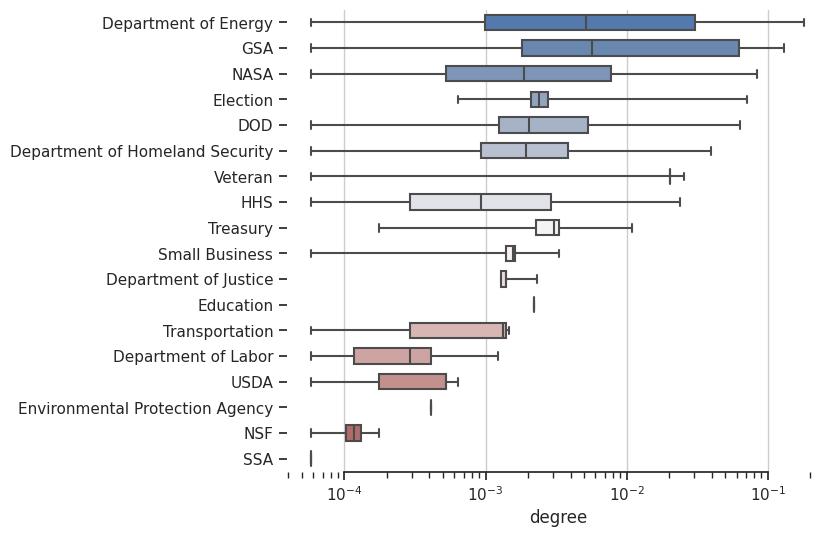

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x="degree", y="agency", data=centr_all_nodes,
            whis=[0, 100], width=.6, palette="vlag")

# # Add in points to show each observation
# sns.stripplot(x="distance", y="method", data=planets,
#               size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [71]:
agency_distr = df_agency.groupby(['agency']).count()

In [73]:
agency_distr.drop(columns=['slug'], inplace=True)

In [80]:
agency_distr.to_csv('codegov_agency_distr.csv', header=False)

In [6]:
import pandas as pd

In [7]:
agency_distr = pd.read_csv('codegov_agency_distr.csv', header=None)

In [8]:
agency_distr

,0,1
0,Department of Energy,20988
1,GSA,6967
2,Department of Homeland Security,2577
3,NASA,1970
4,HHS,917
5,Veteran,574
6,DOD,469
7,Small Business,213
8,Department of Labor,187
9,Treasury,141


In [9]:
agency_distr.columns = ['agency', 'contributors']

In [10]:
agency_distr

,agency,contributors
0,Department of Energy,20988
1,GSA,6967
2,Department of Homeland Security,2577
3,NASA,1970
4,HHS,917
5,Veteran,574
6,DOD,469
7,Small Business,213
8,Department of Labor,187
9,Treasury,141


In [11]:
agency_distr.replace("GSA", 
           "General Services Administration", 
           inplace=True)


agency_distr.replace("NASA", 
           "National Aeronautics and Space Administration", 
           inplace=True)


agency_distr.replace("HHS", 
           "Department of Health & Human Services", 
           inplace=True)

agency_distr.replace("Veteran", 
           "Veteran Affairs", 
           inplace=True)

agency_distr.replace("DOD", 
           "Department of Defence", 
           inplace=True)

agency_distr.replace("Small Business", 
           "Small Business Administration", 
           inplace=True)

agency_distr.replace("Treasury", 
           "Department of the Treasury", 
           inplace=True)

agency_distr.replace("Election", 
           "Federal Election Commision", 
           inplace=True)

agency_distr.replace("USDA", 
           "Deparment of Agriculture", 
           inplace=True)

agency_distr.replace("Transportation", 
           "Department of Transportation", 
           inplace=True)

agency_distr.replace("Education", 
           "Department of Education", 
           inplace=True)

agency_distr.replace("NSF", 
           "National Science Foundation", 
           inplace=True)

agency_distr.replace("SSA", 
           "Social Security Administration", 
           inplace=True)

agency_distr.replace("International", 
           "Agency for International Development", 
           inplace=True)

In [12]:
agency_distr

,agency,contributors
0,Department of Energy,20988
1,General Services Administration,6967
2,Department of Homeland Security,2577
3,National Aeronautics and Space Administration,1970
4,Department of Health & Human Services,917
5,Veteran Affairs,574
6,Department of Defence,469
7,Small Business Administration,213
8,Department of Labor,187
9,Department of the Treasury,141


In [18]:
agency_distr.to_sql('codegov_agency_contributors', engine, if_exists='replace')

19

/tmp/ipykernel_240/2502280815.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(311)


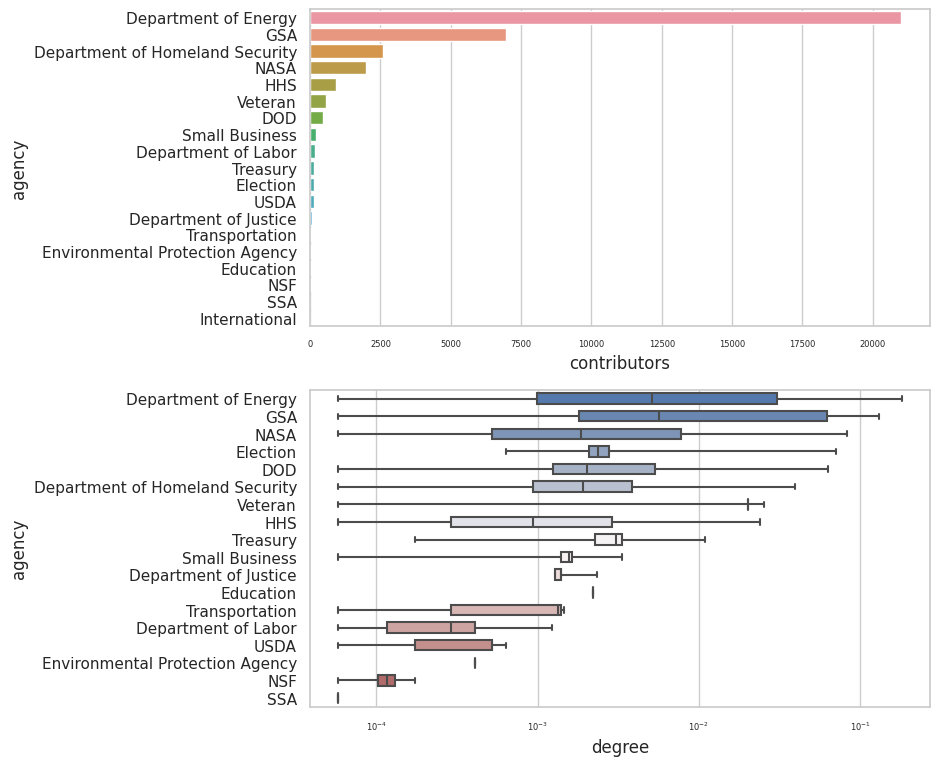

In [125]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 14), sharey=True)

ax1 = plt.subplot(311)
sns.barplot(x="contributors",
            y="agency", 
            data=agency_distr,
            label="Total")
plt.tick_params('x', labelsize=6)

# share x only
ax2 = plt.subplot(312)
ax2.set_xscale("log")
sns.boxplot(data=centr_all_nodes,
            x="degree", 
            y="agency",
            whis=[0, 100], 
            width=.6, 
            palette="vlag"
            )
plt.tick_params('x', labelsize=6)

ax1.get_shared_y_axes()

# make these tick labels invisible
plt.tick_params('x')

In [1]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
networkx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

NameError: name 'degree_centrality' is not defined

##### Closeness Centrality

In [30]:
closeness_dict = networkx.closeness_centrality(G)

KeyboardInterrupt: 

In [40]:
df_close = pd.DataFrame.from_dict(closeness_dict, orient= 'index')

df_close.to_csv('codegov_close_centrality.csv', header=False)



In [31]:
df_close = pd.read_csv('codegov_close_centrality.csv')

df_close.columns = ['node', 'closeness']

df_close.sort_values(by='closeness', ascending=False, inplace=True)

df_close

,node,closeness
9,dependabot[bot],0.473776
904,bmwiedemann,0.428906
2132,hartzell,0.428043
3708,IanLee1521,0.417276
5053,eschnett,0.415350
...,...,...
16863,podestam,0.000058
16862,garrettwrong,0.000058
14219,wilsoa6,0.000058
14218,KShebek,0.000058


In [33]:
df_close.to_sql('codegov_network_closeness_centrality', engine, if_exists='replace')

17184

In [32]:
close_chart = df_close[1:22]
close_chart

<Axes: xlabel='closeness', ylabel='node'>

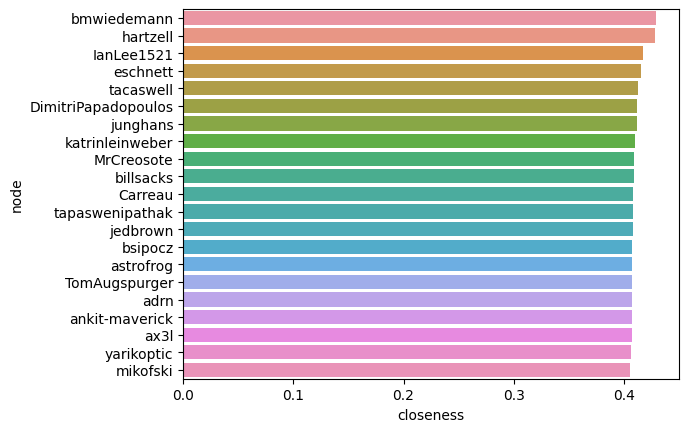

In [35]:
import seaborn as sns

sns.barplot(data=close_chart, x="closeness", y="node")

The viz above shows the top 20 contributors by closeness centrality - we can merge this data with the users data to gather additional information on the users such as their locations/organizations etc.

In [36]:
close_users = pd.merge(close_chart, df_users, left_on='node', right_on='login', how='left')

In [38]:
close_users_agency = pd.merge(close_users, df_agency, left_on='node', right_on='login', how='left')

In [40]:
close_users_agency.drop_duplicates('node').reset_index().drop(columns=['index', 'row_names', 'login_x', 'login_y'])

,node,closeness,name,email,location,company,pronouns,bio,website,twitter,organization,sector,country,iso_2,slug,agency
0,bmwiedemann,0.428906,Bernhard M. Wiedemann,bwiedemann@suse.de,Nuremberg,@SUSE,None,he/him\r\ncoder and sysadmin,http://lizards.opensuse.org/author/bmwiedemann/,None,None,Unknown,Germany,DE,GSA/pysaml2,GSA
1,hartzell,0.428043,George Hartzell,hartzell@alerce.com,None,None,None,None,None,None,None,Unknown,None,None,hpcng/singularity,Department of Energy
2,IanLee1521,0.417276,Ian Lee,lee1001@llnl.gov,"Livermore, CA",@LLNL,None,Computer Engineer @LLNL,https://ianlee1521.com,IanLee1521,Lawrence Livermore National Laboratory,Government,United States,US|US,18F/domain-scan,Department of Energy
3,eschnett,0.415350,Erik Schnetter,schnetter@gmail.com,"Waterloo, Ontario, Canada",Perimeter Institute for Theoretical Physics,None,None,http://www.perimeterinstitute.ca/personal/esch...,None,None,Unknown,Canada,CA|CA,kokkos/spack,Department of Energy
4,tacaswell,0.413011,Thomas A Caswell,tcaswell@gmail.com,New York,Brookhaven National Lab,he/him,Soft condensed matter physicist with a softwar...,https://tacaswell.github.io,None,Brookhaven National Laboratory,Government,United States,US|US,BrookhavenNationalLaboratory/pyRafters,Department of Energy
5,DimitriPapadopoulos,0.412178,Dimitri Papadopoulos,3234522+DimitriPapadopoulos@users.noreply.gith...,Université Paris-Saclay,CEA,None,None,None,None,None,Unknown,France|France,FR|FR,esnet/iperf,Department of Energy
6,junghans,0.412043,Christoph Junghans,junghans@lanl.gov,"Los Alamos, NM, USA",@lanl,None,None,http://www.compphys.de,None,Google,Business,Mexico|United States|Mexico|United States|Mexi...,MX|US|MX|US|MX|US|MX|US,ECP-copa/Cabana,Department of Energy
7,katrinleinweber,0.410309,Katrin Leinweber,9948149+katrinleinweber@users.noreply.github.com,Europe,@gitlabhq,None,"Studied biochemistry, arctic ecology & geology...",GitLab.com/KatrinLeinweber,None,None,Unknown,Germany,FR|FR,hpcng/singularity,Department of Energy
8,MrCreosote,0.409287,MrCreosote,MrCreosote@users.noreply.github.com,None,Lawrence Berkeley National Laboratory,None,None,None,None,Lawrence Berkeley National Laboratory,Government,None,None,kbase/auth,Department of Energy
9,billsacks,0.409276,Bill Sacks,sacks@ucar.edu,United States,NCAR,None,Software engineer working on the Community Ear...,http://staff.ucar.edu/users/sacks,None,University Corporation for Atmospheric Research,Nonprofit,United States,US,E3SM-Project/E3SM,Department of Energy


Below, we show a boxplot for the Closeness Centrality of contributors by Agency.

In [126]:
df_close_agency = pd.merge(df_close, df_agency, left_on='node', right_on='login', how='left')

In [127]:
df_close_agency

,node,closeness,slug,login,agency
0,dependabot[bot],0.473776,ames-market/psst,dependabot[bot],Department of Energy
1,dependabot[bot],0.473776,archspec/archspec,dependabot[bot],Department of Energy
2,dependabot[bot],0.473776,Argonne-National-Laboratory/node-red-contrib-o...,dependabot[bot],Department of Energy
3,dependabot[bot],0.473776,BuildingSync/schema,dependabot[bot],Department of Energy
4,dependabot[bot],0.473776,buildtesters/buildtest,dependabot[bot],Department of Energy
...,...,...,...,...,...
32473,podestam,0.000058,PrincetonUniversity/cuOrbit,podestam,Department of Energy
32474,garrettwrong,0.000058,PrincetonUniversity/cuOrbit,garrettwrong,Department of Energy
32475,wilsoa6,0.000058,NREL/m2p,wilsoa6,Department of Energy
32476,KShebek,0.000058,NREL/m2p,KShebek,Department of Energy


In [128]:
df_close_agency.drop_duplicates('node', inplace=True)
df_close_agency.drop(columns=['slug', 'login',], inplace=True)

In [129]:
df_close_agency.groupby(by="agency").describe()

closeness                                    \
                                    count      mean           std       min   
agency                                                                        
DOD                                 288.0  0.274218  8.419725e-02  0.000116   
Department of Energy              10288.0  0.286553  8.841018e-02  0.000058   
Department of Homeland Security     427.0  0.281439  6.806965e-02  0.000058   
Department of Justice                34.0  0.293703  2.448100e-02  0.270964   
Department of Labor                  49.0  0.158362  1.141744e-01  0.000058   
Education                            21.0  0.327827  5.688200e-17  0.327827   
Election                             39.0  0.321015  2.079862e-02  0.271710   
Environmental Protection Agency       6.0  0.314804  0.000000e+00  0.314804   
GSA                                3902.0  0.296603  6.602560e-02  0.000058   
HHS                                 412.0  0.247211  9.345171e-02  0.000058   
NASA                               1162.0  0.256176  1.021747e-01  0.000058   
NSF                                   4.0  0.000135  2.895098e-05  0.000105   
SSA                                   2.0  0.000058  0.000000e+00  0.000058   
Small Business                       52.0  0.271200  2.883673e-02  0.204011   
Transportation                       27.0  0.237507  1.322988e-01  0.000078   
Treasury                             82.0  0.279571  6.788613e-02  0.000175   
USDA                                 35.0  0.115257  1.203763e-01  0.000058   
Veteran                             354.0  0.327586  3.523615e-02  0.000105   

                                                                         
                                      25%       50%       75%       max  
agency                                                                   
DOD                              0.242443  0.315963  0.316831  0.371598  
Department of Energy             0.265588  0.309613  0.337303  0.473776  
Department of Homeland Security  0.248823  0.314923  0.321611  0.375047  
Department of Justice            0.270964  0.270964  0.319247  0.319368  
Department of Labor              0.000349  0.214969  0.240366  0.315521  
Education                        0.327827  0.327827  0.327827  0.327827  
Election                         0.327927  0.328183  0.329137  0.378257  
Environmental Protection Agency  0.314804  0.314804  0.314804  0.314804  
GSA                              0.270209  0.318359  0.338102  0.428906  
HHS                              0.247268  0.253812  0.315874  0.333749  
NASA                             0.243760  0.286289  0.316870  0.373970  
NSF                              0.000124  0.000131  0.000142  0.000175  
SSA                              0.000058  0.000058  0.000058  0.000058  
Small Business                   0.258050  0.260839  0.274673  0.325301  
Transportation                   0.212208  0.315133  0.315143  0.315152  
Treasury                         0.277839  0.277839  0.315646  0.334236  
USDA                             0.000524  0.000524  0.243137  0.258528  
Veteran                          0.332085  0.332085  0.332085  0.334126

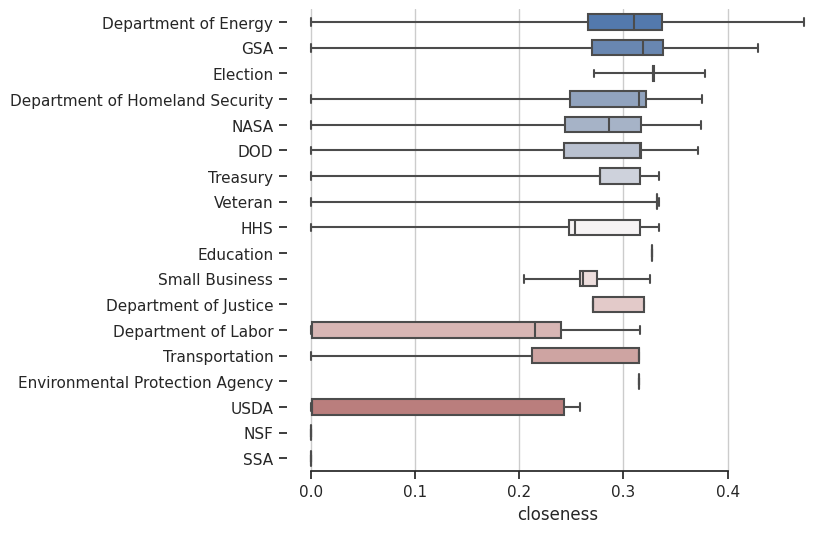

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x="closeness", y="agency", data=df_close_agency,
            whis=[0, 100], width=.6, palette="vlag")

# # Add in points to show each observation
# sns.stripplot(x="distance", y="method", data=planets,
#               size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Interpretation: 

##### Betweeness Centrality

In [136]:
betweewn_dict = networkx.betweenness_centrality(G)

In [139]:
df_between = pd.DataFrame.from_dict(betweewn_dict, orient= 'index')

df_between.to_csv('codegov_betweeness_centrality.csv', header=False)

In [34]:
df_between = pd.read_csv('codegov_betweeness_centrality.csv')

df_between.columns = ['node', 'betweeness']

df_between.sort_values(by='betweeness', ascending=False, inplace=True)

df_between

,node,betweeness
9,dependabot[bot],0.288175
2132,hartzell,0.040241
3708,IanLee1521,0.034338
1104,frewsxcv,0.022653
1452,msabramo,0.021782
...,...,...
5819,AMDmi3,0.000000
5820,AdriCS,0.000000
5821,Alexibu,0.000000
5822,AnyOldName3,0.000000


In [35]:
df_between.to_sql('codegov_network_betweeneess_centrality', engine, if_exists='replace')

17184

##### Eigenvector Centrality

In [137]:
eigen_dict = networkx.eigenvector_centrality(G)

In [138]:
eigen_dict

{'0111sandesh': 3.338981104981067e-07,
 'SaikrishnaBairamoni': 3.339008792218234e-07,
 'Schwartz-Matthew-bah': 3.338981104981067e-07,
 'TonyEnglish': 3.338981104981067e-07,
 'ToryB1': 3.338981104981067e-07,
 'abey-yoseph': 3.338981104981067e-07,
 'alexsobledotgov': 4.470690834744039e-07,
 'bbrotsos': 4.5562138226171516e-07,
 'dan-du-car': 3.339008792218234e-07,
 'danrasband': 3.338981104981067e-07,
 'dependabot[bot]': 0.0004253197220705452,
 'dmccoystephenson': 3.339008792218234e-07,
 'drewjj': 3.339008792218234e-07,
 'hmusavi': 3.339008792218234e-07,
 'iyourshaw': 3.338981104981067e-07,
 'jtbaird': 3.338981104981067e-07,
 'lauraGgit': 1.3503403363762815e-06,
 'mgarramo': 3.338981104981067e-07,
 'mvs5465': 3.338981104981067e-07,
 'payneBrandon': 3.339008792218234e-07,
 'snallamothu': 3.338981104981067e-07,
 'southernsun': 3.338981104981067e-07,
 'tonychen091': 3.339008792218234e-07,
 'trevor-trou': 3.338981104981067e-07,
 '0mp': 3.740448268427689e-05,
 '12101111': 3.740448268427689e-05

In [141]:
df_eigen = pd.DataFrame.from_dict(eigen_dict, orient= 'index')

df_eigen.to_csv('codegov_eigen_centrality.csv', header=False)

In [36]:
df_eigen = pd.read_csv('codegov_eigen_centrality.csv')

df_eigen.columns = ['node', 'eigenvector']

df_eigen.sort_values(by='eigenvector', ascending=False, inplace=True)

df_eigen

,node,eigenvector
1104,frewsxcv,2.790569e-02
1135,goxberry,2.783743e-02
904,bmwiedemann,2.783708e-02
1199,isuruf,2.780264e-02
999,danielsjensen1,2.779542e-02
...,...,...
16722,dgct,2.572704e-92
16669,mrSkortch,2.572704e-92
16668,davidp57,2.572704e-92
16665,gilbertbw,2.572704e-92


In [37]:
df_eigen.to_sql('codegov_network_eigen_centrality', engine, if_exists='replace')

17184

#### Clustering Metrics

In [72]:
networkx.average_clustering(G)

0.9190457046570154

Average Clustering Coefficient for the graph is the sum of the clustering coefficients for all the nodes in the graph divided by the number of nodes in graph. Average Clustering Coefficient for the Contributor Network is: 

#### Community Detection Algorithms

In [73]:
c = networkx.community.greedy_modularity_communities(G)

Greedy Modularity function uses the Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity. Modularity is a measure of goodness of partitioning a network into communities in that communities have many edges within each partitioned community and few between the communities.

In [75]:
sorted(c[0])

['0111sandesh',
 '0xaf1f',
 '0xflotus',
 '0xmachos',
 '1Copenut',
 '2018-02-15T16:30:44-07:00',
 '21dmohan',
 '3rav',
 '3x0dv5',
 '7islands',
 '8ig8',
 'AABoyles',
 'AAndersn',
 'ABrambleNinja',
 'ADPennington',
 'AGuyNamedMarco',
 'ALouis38',
 'AMReX-Fusion',
 'AP97',
 'ATNDiaye',
 'ATRADER1000',
 'ATeal',
 'Aamer21',
 'AboorvaDevarajan',
 'AbsCode',
 'AdamFreemer',
 'AdamSimpson',
 'AdelekeBankole',
 'Adrian-Diaz',
 'Adriennelg',
 'AhsenBaig',
 'AileenMcGraw-PIF',
 'Akshay-Venkatesh',
 'AlastairPooley',
 'AlejandroColinaGSA',
 'AleksiNummelin',
 'AlexanderSherrow',
 'AlexanderSinn',
 'AlexandreLapene',
 'AlexandreMinotCSI',
 'AlexeyMalkhanov',
 'AlexisMarb',
 'AlexisPerry',
 'AlexyPellegrini',
 'AllieTbo',
 'AlvandSalehi',
 'AminPIC',
 'Amstercad',
 'AmyKort',
 'AnabelSMRuggiero',
 'AndersNiklasson',
 'Andr00dz',
 'AndreaSigz',
 'AndreasOpdahl',
 'Andrew565',
 'AndrewAvalos',
 'AndrewGaspar',
 'AngelFP',
 'AngenZheng',
 'AnnaShchelokova',
 'AnneFelden',
 'AnonNick',
 'AnthonyDiGirola